# Scenario

New York City Taxi and Limousine Commission (TLC) is an agency responsible for licensing and regulating New York City's taxi cabs and for-hire vehicles.

The TLC data comes from over 200,000 taxi and limousine licensees, making approximately one million combined trips per day.

In this activity, I will examine the data provided and prepare it for analysis. I will also design a professional data visualization that tells a story, and will help data-driven decisions for TLC.


# Aim

To conduct an extensive explanatory data analysis on a provided data set to identify a possibility of an idea to generate more revenues for TLC.

Once I find the idea, I will continue by examining the statistical significance using hypothesis testing.




# Part 1: Explanatory Data Analysis

## **Import the data and the relevant libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns 
from scipy import stats

In [2]:
df=pd.read_csv('/Users/adel/Desktop/TLC/2017_Yellow_Taxi_Trip_Data.csv')

## **Data exploration and cleaning**

### **a)** Discover the data set

Discovering the data set is very crucial:
    For the following task I have uploaded a link that directs me to     the data base administrator (NYC OpenData). In this link I will find all the relevant information about the source of the data as well as a data dictionary.
    
<iframe src="/Users/adel/Desktop/Yellow_Taxi_Trip_Data_Data_Dictionary.xlsx" width="100%" height="500px"></iframe>

[NYC OpenData](https://data.cityofnewyork.us/Transportation/2021-Yellow-Taxi-Trip-Data/m6nq-qud6/about_data)

### **b)** Understand the structure of the data

Functions that help:

* head()
* info() - to print a concise summary of a DataFrame, including the data types of each column, the number of non-null values, and memory usage
* describe() - to generate descriptive statistics of a DataFrame
* groupby()
* sortby()

In [3]:
#display the first 5 rows of the dataset
df.head(5)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [4]:
df.info()
#The info() enabled me to know that I don't have any missing values in the dataset.
df.shape
#The shape enabled me to know that I will be dealing with 22,699 data points with 17 avaliable variables / features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

(22699, 18)

**Does the following data types for the variable makes sense?**

* VendorID - int64 - makes sense since it represents identification number

* tpep_pickup_datetime - object - dates should be **datetime** objects

* tpep_dropoff_datetime - object -  dates should be **datetime** objects

* fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount - float64 - makes sense since all these values represent dollar value

* PULocationID, DOLocationID - int64 - **needs to be investigated!!!!!**

* !!payment_type!! - **int64** - Since it is a type of payment I should expect a string. For ex, Cash or Credit!!! - **needs to be investigated!!!!!**

### **c)** Convert data columns to datetime

In [5]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()


df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday


### **d-1)** Check for missing Values

There is no missing data according to the results from the `info()` function. 

### **d-2)** Check for duplicate values

In [6]:
df.duplicated().sum()

0

The data set contains 0 duplicates

### **d-3)** Check for Outliers

To check for outlier, several methods can be effective:

* **1- Summary Statistics:** Calculate summary statistics such as mean, median, standard deviation, and quartiles (25th and 75th percentiles) to get an overview of the data distribution. Outliers are often defined as observations that fall far from the mean or median.

* **2- Box Plot:** Visualize the data distribution using a box plot (also known as a box-and-whisker plot). Outliers are typically identified as data points that fall outside the "whiskers" of the box plot, which are defined as 1.5 times the interquartile range (IQR) above the 75th percentile or below the 25th percentile.

* **3- Histogram:** Plot a histogram of the data to visualize the frequency distribution. Outliers may appear as data points that are far from the bulk of the data or as isolated peaks in the histogram.

* **4- Scatter Plot:** For datasets with two or more variables, create scatter plots to visualize the relationship between variables. Outliers may appear as data points that deviate significantly from the overall pattern or trend in the scatter plot.

* **5- Z-Score:** Calculate the z-score for each data point, which measures how many standard deviations away from the mean a data point is. Data points with a z-score above a certain threshold (e.g., 3 or -3) may be considered outliers.

* **6- Tukey's Method:** Use Tukey's method, which defines outliers as data points that fall below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR.

**Box Plot**

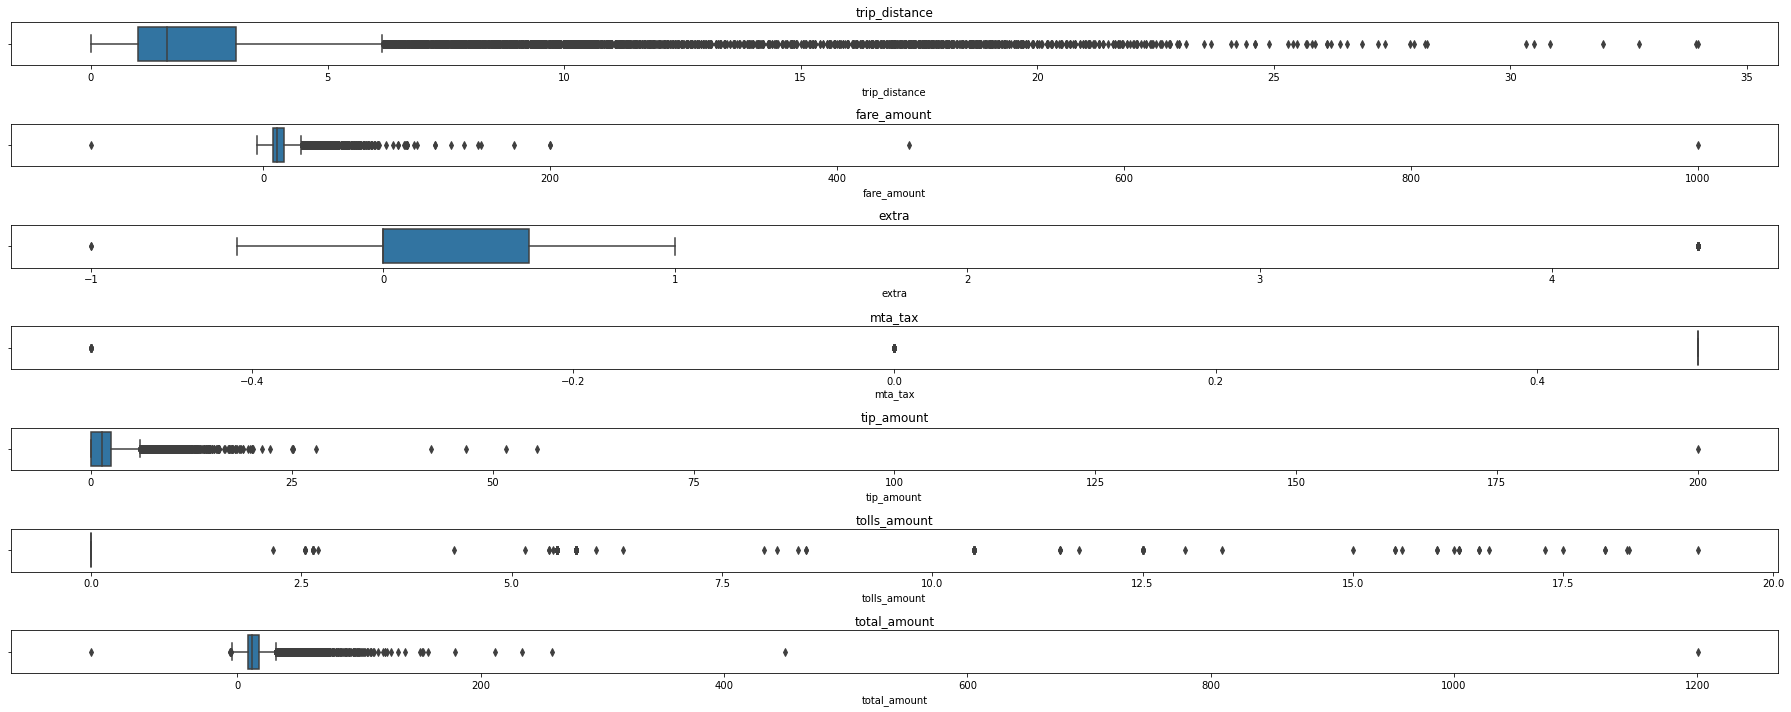

In [7]:
# Specify the columns I want to include in the box plot
columns = ['trip_distance', 'fare_amount', 'extra','mta_tax','tip_amount','tolls_amount','total_amount'] 

# Set up figure and axes configuration
fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(25, 10))

# Create box plots for multiple variables
for i, column in enumerate(columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(column)  # Set title for each subplot

# Customize axes labels and ticks


plt.tight_layout()

plt.savefig('box plots.pdf')

It looks like the column trip distance have significant outliers, therefore, I'm going to investigate trip distance

In [8]:
df['trip_distance'].describe()

count    22699.000000
mean         2.913313
std          3.653171
min          0.000000
25%          0.990000
50%          1.610000
75%          3.060000
max         33.960000
Name: trip_distance, dtype: float64

### **e)** Investigate the relevant variables 

### Trip Distance

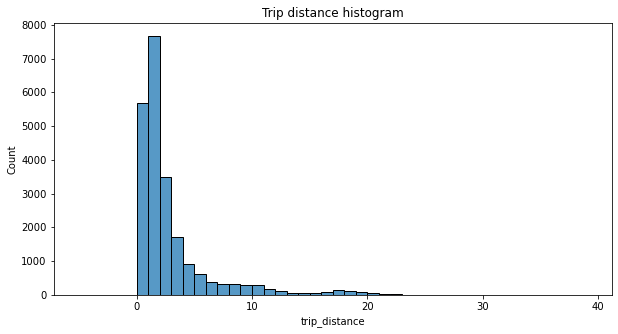

In [9]:
# Create histogram of trip_distance
plt.figure(figsize=(10,5))
sns.histplot(df['trip_distance'], bins=range(-5,40,1))
plt.title('Trip distance histogram');

plt.savefig('Trip distance histogram.pdf')

The majority of trips were journeys of less than two miles.

### Total amount

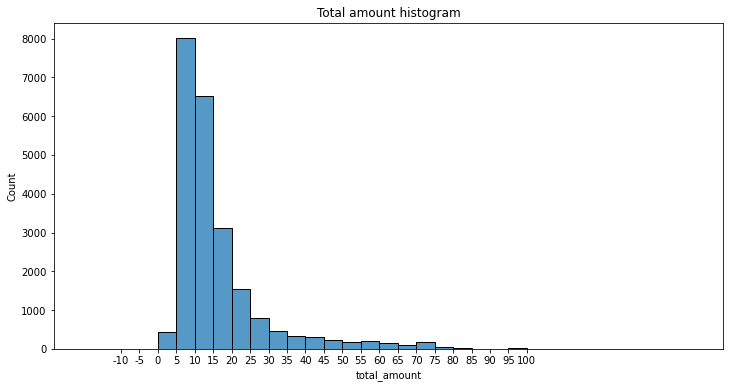

In [10]:
# Create histogram of total_amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df['total_amount'], bins=range(-20,150,5))
ax.set_xticks(range(-10,101,5))
ax.set_xticklabels(range(-10,101,5))
plt.title('Total amount histogram');

plt.savefig('Total amount histogram.pdf')

It looks like the total cost of each trip also has a right skewed distribution, with most costs falling in the $5-15 range.

### Tip amount

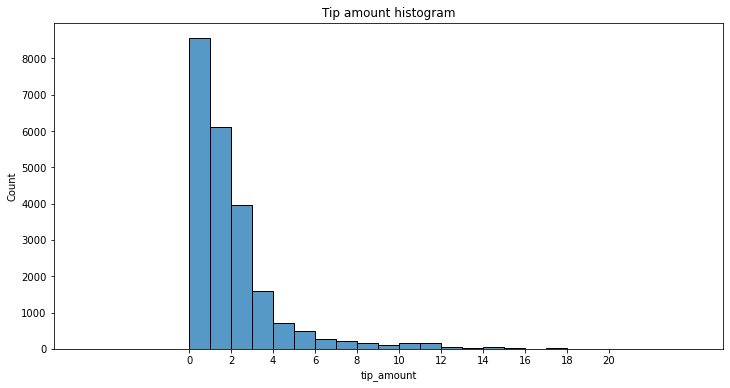

In [11]:
# Create histogram of tip_amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df['tip_amount'], bins=range(-5,25,1))
ax.set_xticks(range(0,21,2))
ax.set_xticklabels(range(0,21,2))
plt.title('Tip amount histogram');

plt.savefig('Tip amount histogram.pdf')

It looks like the tip amount of each trip also has a right skewed distribution, with most amount falling in the $0-4 range.

### Vendor

In New York, taxi services are offered by two vendors: Creative Mobile Technologies, LLC (Vendor 1) and VeriFone Inc. (Vendor 2).

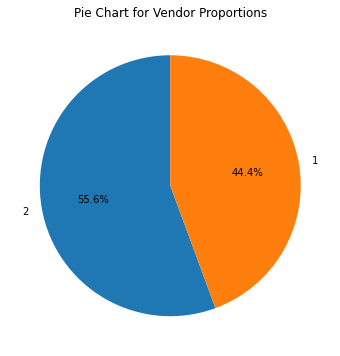

In [12]:
# Count occurrences of each label
label_counts = df['VendorID'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Pie Chart for Vendor Proportions')

plt.savefig('Pie Chart for Vendor Proportions 1.pdf')
# Show the plot
plt.show()




VeriFone Inc contributes more than Creative Mobile Technologies, LLC. However, the difference in the following data set is not very significant.

### Total amount vs Vendor

/Users/adel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


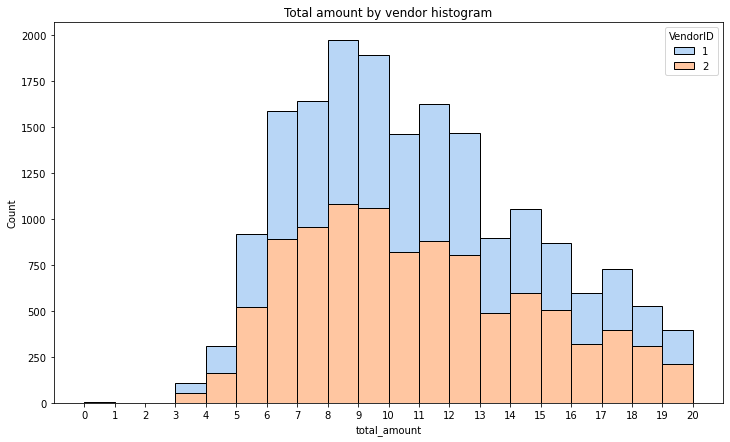

In [13]:
# Create histogram of tip_amount by vendor
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df, x='total_amount', bins=range(0,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Total amount by vendor histogram');

plt.savefig('Total amount by vendor histogram.pdf')

There are no noticeable difference in the distribution of total amount between the two vendors in the dataset.

### Payment Types

In [14]:
payment_types = df["payment_type"].value_counts()
payment_types.index

Int64Index([1, 2, 3, 4], dtype='int64')

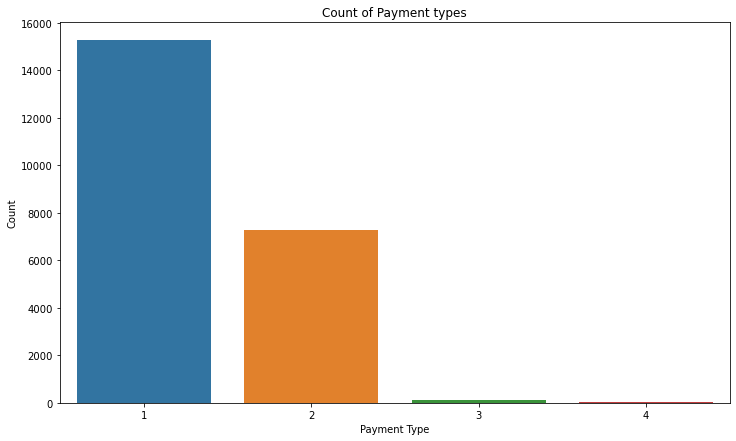

In [15]:
# Create a bar plot of total rides per month
plt.figure(figsize=(12,7))
sns.barplot(x=payment_types.index, y=payment_types)

plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.title("Count of Payment types")

plt.savefig('Count of Payment types 1.pdf')
plt.show()



Since the most widely used method of payment is credit card, I assume that payment type 1 referes to credit card and 2 refers to cash. There is still no clear assumptions regarding 3 and 4.

* 1: **credit card**
* 2: **cash**


### **Investigate total amount (Continued)**

Total amount is directly postively correlated with revenues: As total_amount increases, revnues will increase.

Total amount = fare amount + extra + mta_tax + tip_amount + tolls_amount + improvement_surcharge

To closely investigate the total amount we have to know which variable contributes most to the total amount; therefore, I developed the following function that gives me an idea.

In [16]:

def ratio_amounts_to_total_amount (y,x):
    '''
     This functions is created to check the contribution of amounts to the total_amount
     '''
# Initialize an empty list to store the ratios
    ratios = []

# Iterate over the data points
    for i in range(len(y)):
    # Check if the denominator is not zero to avoid division by zero error
        if  y[i] != 0:
            ratio = (x[i] / y[i])*100
            ratios.append(ratio)
        else:
        # Handle division by zero error
            ratios.append(float('inf'))
    return ratios  



In [17]:
ratio_amounts_to_total_amount(df["total_amount"], df["fare_amount"])

[78.50241545893721,
 76.92307692307692,
 74.28571428571429,
 74.03394727338389,
 92.69662921348313,
 72.81553398058253,
 80.29073698444896,
 81.71603677221655,
 91.83673469387755,
 78.54984894259819,
 77.91327913279133,
 71.31102578167855,
 74.44168734491315,
 73.30246913580247,
 76.58643326039387,
 83.33333333333333,
 72.8862973760933,
 92.23300970873785,
 73.52941176470588,
 71.875,
 83.33333333333334,
 70.49891540130152,
 70.51282051282051,
 67.6328502415459,
 72.8476821192053,
 66.17038875103391,
 75.80174927113703,
 87.3015873015873,
 77.73851590106007,
 71.82618064284432,
 77.37656595431098,
 91.83673469387755,
 96.88995215311006,
 74.69879518072288,
 80.76923076923077,
 87.96296296296295,
 86.20689655172414,
 77.91327913279133,
 72.46376811594205,
 56.390977443609025,
 70.05899705014748,
 76.59574468085107,
 85.4922279792746,
 71.27192982456141,
 61.274509803921575,
 66.14785992217898,
 92.92035398230087,
 80.03048780487805,
 89.43089430894308,
 67.82945736434108,
 96.9581749049

After running this function on all the amount variables, I concluded that **Fare amount** contributes the most and therefore has to be investigated.


#### Look for any possible trends in the total amount for the months of 2017


In [18]:
# Reorder the monthly ride list so months go in order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

total_amount_month = df.groupby('month').agg({"total_amount": "sum"})
total_amount_month = total_amount_month.reindex(index=month_order)
total_amount_month

,total_amount
month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


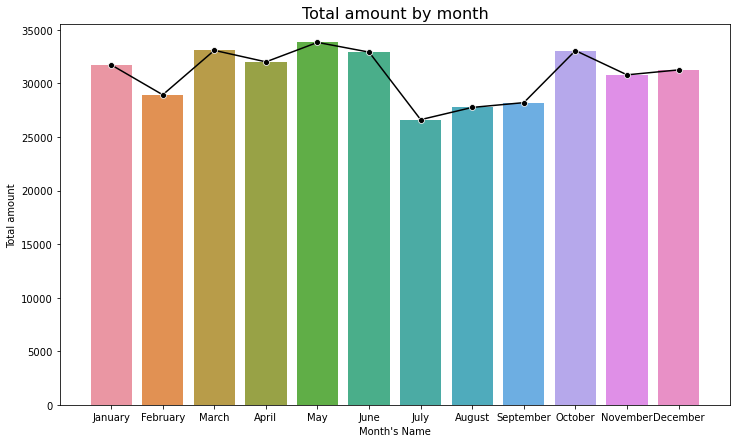

In [19]:
# Create a bar plot of total amount by month
plt.figure(figsize=(12,7))
sns.barplot(x=total_amount_month.index, y=total_amount_month['total_amount'])
sns.lineplot(x=total_amount_month.index, y=total_amount_month['total_amount'], color='black', marker='o')

plt.title('Total amount by month', fontsize=16)
plt.xlabel("Month's Name")
plt.ylabel("Total amount");

plt.savefig('Total amount by month.pdf')

It looks like there is a small trend of negative sloping in the months of July, August and September. However, the trend is not very significant and might be due to several reason taking seasons into consideration. **This will be out of the scope of the project**. *I might have to model that in a time series with much more historical data!*

In [20]:
# Reorder the day column
month_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_day_amount = df.groupby('day').agg({'total_amount': 'sum'})
total_day_amount = total_day_amount.reindex(index =month_order )
total_day_amount



,total_amount
day,
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


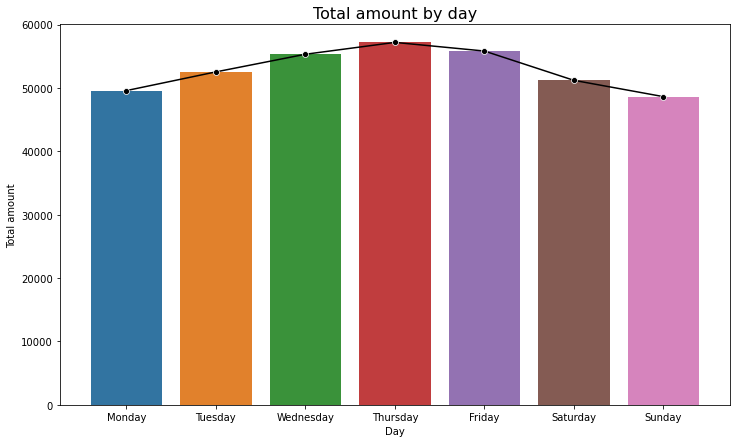

In [21]:
# Create a bar plot of total amount by day
plt.figure(figsize=(12,7))
sns.barplot(x=total_day_amount.index, y=total_day_amount['total_amount'])
sns.lineplot(x=total_day_amount.index, y=total_day_amount['total_amount'], color='black', marker='o')

plt.title('Total amount by day', fontsize=16)
plt.xlabel("Day")
plt.ylabel("Total amount");

plt.savefig('Total amount by day.pdf')

It looks like the lowest days of total amount are Mondays and Sundays. In this case, the Idea of probably increasing the presence of taxi cabs in these days will generate more revenues. However, It doesn't seem like a concrete idea, and thus I decided to continue looking for a better one.

###  Investigate fare amount

#### Examine the relationship between fare amount and trip distance


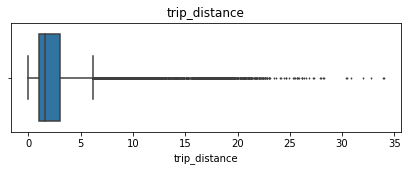

In [22]:
#Check for outliers in trip distance to have an idea about the distance
# Create box plot of trip_distance
plt.figure(figsize=(7,2))
plt.title('trip_distance')
sns.boxplot(data=None, x=df['trip_distance'], fliersize=1);


The majority of the trips falls within [1,2] miles; however, we have long distance trips which is represented after the 3rd Quartile of the box plot 

In [23]:
short_trips= (df[(df['trip_distance'] > 0) & (df['trip_distance'] <= 2)])
short_trips_fare_mean = short_trips['fare_amount'].mean()

long_trips = df[df['trip_distance'] > 2]
long_trips_fare_mean = long_trips['fare_amount'].mean()

print("The avg fare amount of short trips is: {}".format(short_trips_fare_mean))
print("The avg fare amount of long trips is: {}".format(long_trips_fare_mean))


The avg fare amount of short trips is: 7.449375835934017
The avg fare amount of long trips is: 21.116728252501925


I noticed that the fare amount of long trips are greater than short trips. However, this is theoratically known since fare amount and trip distance are positively correlated.

So it makes sense for long trips to cost more, and therefore I will **NOT** be able to provide an idea to promote long distances trips because it is not practical in reality.

In [24]:
# Compute the correlation coefficient between trip distance and fare amount
correlation_coefficient = df['trip_distance'].corr(df['fare_amount'])
print("correlation_coefficient is: {}".format(correlation_coefficient))


correlation_coefficient is: 0.7565989842423747


I know from statistics that -1 < correlation coefficient > 1
* 1: strongly positively correlated
* -1: strongly negatively correlated

The corr between the fare amount and trip distance is 0.7565 which supports my claim in the previous cell.

#### Examine the relationship between fare amount and payment type

Recall that payment type 1: refers to credit card and 2: refers to cash

**Theoratical expectation:** I should Not notice a differnce between fare amount and payment type. So *lets examine that*.

In [25]:
df_CC = df[df['payment_type'] == 1]
df_CC_fare = df_CC['fare_amount'].mean()

df_cash = df[df['payment_type'] == 2]
df_cash_fare = df_cash['fare_amount'].mean()

print("The mean fare value of credit card is: {}".format(df_CC_fare))
print("The mean fare value of cash is: {}".format(df_cash_fare))


The mean fare value of credit card is: 13.429747789059942
The mean fare value of cash is: 12.21354616760699


**!!! I didn't expect to see this result!!!** customers who pay with credit cards pays on average more fare amount that customers who pay in cash

##### The IDEA to generate more revenue for TLC

I believe if TLC was able to initiate a marketing campaign to promote credit card payments, this will increase the fare amount of trips.

Given we investigated the relationship between fare amount and total amount, we noticed that fare amount contributes well to the total amount. 

Therefore, if TLC was able to increase fare amount, the total amount will significantly increase and thus the total revenues will increase.

**!!This is a very intersting idea!!**

However, there is a very important Question to ask before implementing this idea.

Is the difference in fare amount between credit cards and cash  **statistically significant** or is it just due to **random variation**

I will examine this claim in PART 2 of this project.



# Part 2: Hypothesis Testing

**Examine my idea through Statistical Analysis**

To perform Statistical analysis, specifically -Hypothesis testing- I have to do random sampling. 

**Note:** For the purpose of this exercise, I will assume that the sample data comes from an experiment in which customers are randomly selected and divided into two groups: 1) customers who are required to pay with credit card, 2) customers who are required to pay with cash. Without this assumption, I cannot draw causal conclusions about how payment method affects fare amount.

In reality, random sampling has a complex methodology and requires experiment designs to be able to subset our population into **representative samples** that eliminates or at the least reduces the possibility of having bias in our estimation results.

**Claim:** I believe if TLC was able to initiate a marketing campaign to promote credit card payments, this will increase the fare amount of trips, thus increases TLC total revenues.

**Goal:** To apply hypothesis testing and analyze whether there is a relationship between payment type and fare amount. For example: discover if customers who use credit cards pay higher fare amounts than customers who use cash.

**Expectations:** If what I claimed is statistically significant; therefore, as a consultant, I have to suggest for TLC to do a marketing campaign to promote credit card payments and increase revenues.

**Question:** Is there a relationship between fare amount and payment type?

## Understand the probability distribution of fare amount



**Using a fast visualization technique - Histogram**

In [26]:
CC_hist = pd.DataFrame(data = {"fare_amount" : df_CC['fare_amount']})

cash_hist = pd.DataFrame(data = {"fare_amount" : df_cash['fare_amount']})

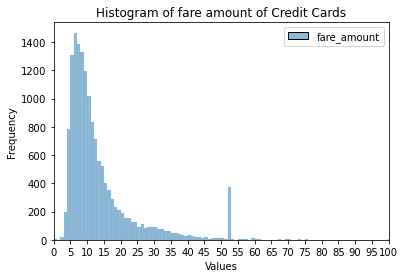

In [27]:
# Create a histogram using Seaborn
sns.histplot(CC_hist, bins=1000)  # bins: number of bins, kde: whether to plot a kernel density estimate

# Customize x-axis
tick_step = 5
x_ticks = np.arange(0, 1000, tick_step)  # Generate a range of tick locations with step 0.5
plt.xticks(x_ticks)

plt.xlim(0, 100)  # Set limits of x-axis from 0 to 60

plt.title('Histogram of fare amount of Credit Cards')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.savefig('Histogram of fare amount of Credit Cards.pdf')
plt.show()

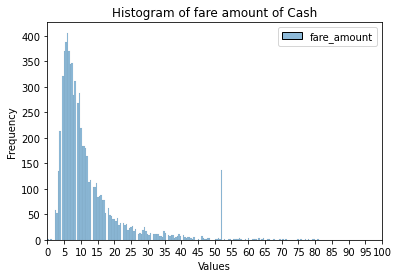

In [28]:
# Create a histogram using Seaborn
sns.histplot(cash_hist, bins=1000)  # bins: number of bins, kde: whether to plot a kernel density estimate

# Customize x-axis
tick_step = 5
x_ticks = np.arange(0, 1000, tick_step)  # Generate a range of tick locations with step 0.5
plt.xticks(x_ticks)

plt.xlim(0, 100)  # Set limits of x-axis from 0 to 60

plt.title('Histogram of fare amount of Cash')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.savefig('Histogram of fare amount of Cash.pdf')
plt.show()

Both ditributions resembles a right-skewed normal distribution - positively skewed

**Use the Normal distribution emperical values to check for normality**


In [29]:
def emperical_normal (df,num):
    
    mean = df.mean()
    std = df.std()
    print("mean is: {}".format(mean))
    print("Std is: {}".format(std))
    
    lower_limit = mean - num * std
    upper_limit = mean + num * std
    print("lower_limit is: {}" .format(lower_limit))
    print("upper_limit is: {}" .format(upper_limit))
    
    emperical_dist = ((df >= lower_limit) & (df <= upper_limit)).mean()*100
    return emperical_dist

In [30]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
    
def emperical_normal (df):
    
    num = [1,2,3]
    emperical_df = pd.DataFrame()
    
    for i in num:
    
        mean = df.mean()
        std = df.std()
    
        lower_limit = mean - i * std
        upper_limit = mean + i * std
    
        emperical_dist = ((df >= lower_limit) & (df <= upper_limit)).mean()*100
    
        emperical_dict = {"Mean": mean,
                 "Std": std,
                 "lower_limit": lower_limit,
                 "upper_limit": upper_limit,
                 "Distribution percentage %":emperical_dist}
        
        
        index = [f'Interval {68 if i==1 else 95 if i==2 else 99.7}'"%".format(i)]  #Using list of comprehension
    
            
        emperical_df = emperical_df.append(pd.DataFrame(emperical_dict, index=index))
        
 
        
    return emperical_df

Under this rule:
* **68%** of the data falls within one standard deviation
* **95%** percent within two standard deviations
* **99.7%** within three standard deviations from the mean.

**Checking for Normality in fare values for Credit Card payments**

In [31]:
emperical_normal(df_CC['fare_amount'])

,Mean,Std,lower_limit,upper_limit,Distribution percentage %
Interval 68%,13.429748,13.848964,-0.419216,27.278711,90.540452
Interval 95%,13.429748,13.848964,-14.268179,41.127675,95.958074
Interval 99.7%,13.429748,13.848964,-28.117143,54.976638,99.403865


Interval 95% = 95.958074 - Which is approximately equal

Interval 99.7% = 99.403865 - Which is approximately equal

Interval 68% = 90.540452 - NOT equal; however, this is because majority of the values are on the left curve (right-skwed) as the histogram showed me.

**Checking for Normality in fare values for Credit Card payments**

In [32]:
emperical_normal(df_cash['fare_amount'])

,Mean,Std,lower_limit,upper_limit,Distribution percentage %
Interval 68%,12.213546,11.68994,0.523606,23.903486,90.477501
Interval 95%,12.213546,11.68994,-11.166334,35.593426,95.569011
Interval 99.7%,12.213546,11.68994,-22.856274,47.283367,97.289115


Interval 95% = 95.958074 - Which is approximately equal

Interval 99.7% = 99.403865 - Which is approximately equal

Interval 68% = 90.540452 - NOT equal; however, this is because majority of the values are on the left curve (right-skwed) as the histogram showed me.

I concluded that the distribution of fare amounts for credit card and cash payments approximately follows a **right-skewed normal distribution**

## Hypothesis Testing

**Assumptions:** The two groups are Independant and the population standard deviation is not known.

Before I conduct the hypothesis test, I should consider the following questions where applicable to complete my code response:

1. Recall the difference between the null hypothesis and the alternative hypotheses. Consider my hypotheses for this project as listed below.

$H_0$: There is no difference in the average fare amount between customers who use credit cards and customers who use cash.

$H_A$: There is a difference in the average fare amount between customers who use credit cards and customers who use cash.

Steps is to conduct a two-sample t-test: 


1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis 

I choose 5% as the significance level and proceed with a two-sample t-test.

* 1- One-sample t-test: Compares the mean of a single sample to a known value or hypothesized mean.
* **2- Two-sample t-test: Determines if there is a significant difference between the means of two independent samples.**
* 3- Paired t-test: Assesses whether the means of two dependent samples differ significantly.
* 4- Chi-square test: Examines the association between categorical variables in a contingency table.
* 5- ANOVA (Analysis of Variance): Tests for differences in means across multiple groups or treatments.
* 6- ANOVA with repeated measures: Determines differences in means across multiple related groups, such as in longitudinal studies.
* 7- Mann-Whitney U test: Nonparametric test for comparing the medians of two independent groups when assumptions of the t-test are not met.
* 8- Wilcoxon signed-rank test: Nonparametric alternative to the paired t-test for comparing the medians of two related groups.
* 9- Kruskal-Wallis test: Nonparametric alternative to one-way ANOVA for comparing the medians of three or more independent groups.
* 10- Fisher's exact test: Determines if there is an association between two categorical variables in a contingency table with small sample sizes.
* 11- Binomial test: Assesses whether the proportion of successes in a sample differs significantly from a hypothesized value.
* 12- Sign test: Nonparametric test for comparing medians or proportions of paired data.
* 13- Z-test: Similar to the t-test but used when the population standard deviation is known.
* 14- Mood's median test: Nonparametric test for comparing the medians of two independent groups.
* 15- Cochran's Q test: Nonparametric test for comparing three or more matched groups when the outcome is dichotomous.
* 16- Friedman test: Nonparametric alternative to repeated measures ANOVA for comparing three or more related groups.
* 17- McNemar's test: Tests for differences in proportions of paired data, often used in before-after studies.
* 18- Logistic regression: Statistical method for analyzing the association between a binary outcome variable and one or more predictor variables.
* 19- Survival analysis: Statistical techniques for analyzing time-to-event data, often used in medical research or reliability analysis.
* 20- Permutation test: Nonparametric test that does not rely on distributional assumptions, often used in situations where traditional tests are not appropriate.

In [33]:
sig_level = 0.05

statistic, p_value = stats.ttest_ind(df_CC["fare_amount"], df_cash["fare_amount"], equal_var=False)

In [34]:
p_value

6.797387473030518e-12

## Conclusion

**Result:** p_value < 0.05 (Significance level) 

$H_0$: There is no difference in the average fare amount between customers who use credit cards and customers who use cash.

**Conclusion:** I reject the Null Hypothesis 

Therefore, the diffrence between the average fare amount between credit card and cash payments is **Statistically significant**





## Business Decision

Given I investigated the relationship between fare amount and total revenue, I noticed that fare amount contributes well to the total revenue.

So, I believe if TLC was able to initiate a marketing capmaign to promote **credit card payments** this will increase the fare amount per single trip, and thus the total revenues will increase.